# Univariate data analyses - NHANES case study

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
# set notebook environment
%precision %.3f
pd.options.display.float_format = '{:,.3f}'.format
plt.rcParams["figure.figsize"] = 10,8
pd.set_option('display.width', 100)

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv("data/nhanes_2015_2016.csv")

In [4]:
df.sample(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
130,83962,1.000,nan,1.000,2,2,28,4,1.000,5.000,...,108.000,62.000,68.400,166.500,24.700,41.500,38.000,30.500,88.000,1.000
4455,91454,1.000,nan,1.000,1,2,68,2,1.000,3.000,...,136.000,92.000,71.400,160.000,27.900,28.500,35.500,31.000,112.200,2.000
599,84763,2.000,2.000,nan,2,2,56,1,2.000,1.000,...,150.000,78.000,66.000,162.400,25.000,34.300,37.800,32.800,92.300,nan


## Frequency Tables

The `value_counts` method can be used to determine the number of times that each distinct value of a variable occurs in a data set. In statistical terms, this is the "frequency distribution* of the variable.

Below we show the frequency distribution of the DMDEDUC2 variable, which is a variable that reflects a person's level of educational attainment:

In [5]:
df["DMDEDUC2"].value_counts()

4.000    1621
5.000    1366
3.000    1186
1.000     655
2.000     643
9.000       3
Name: DMDEDUC2, dtype: int64

This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.  
Note that the `value_counts` method excludes missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

---
From the above `info` table we can see that our data set contains a total of 5735 rows and 28 columns and that DMDEDUC2 contains 5474 non-null elements

In [7]:
nan_in_dmed = df.shape[0] - df.DMDEDUC2.value_counts().sum()
print(f'DMDEDUC2 contains {nan_in_dmed} empty elements')

DMDEDUC2 contains 261 empty elements


Another way to obtain the number of missing values in a given feature:

In [8]:
pd.isnull(df["DMDEDUC2"]).sum()

261

n some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [9]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [10]:
# we replace genders with words
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

In [11]:
# Value count as proportion
df["DMDEDUC2"].value_counts(normalize=True, ascending=False)

4.000   0.296
5.000   0.250
3.000   0.217
1.000   0.120
2.000   0.117
9.000   0.001
Name: DMDEDUC2, dtype: float64

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries. Below we create a new category called "Missing",

In [12]:
df["DMDEDUC2x"] = df.DMDEDUC2x.fillna("Missing")
df["DMDEDUC2x"].value_counts(normalize=True, ascending=False)

Some college/AA   0.283
College           0.238
HS/GED            0.207
<9                0.114
9-11              0.112
Missing           0.046
Don't know        0.001
Name: DMDEDUC2x, dtype: float64

## Numerical Summaries

body weight variable (BMXWT)

In [13]:
df.BMXWT.describe()

count   5,666.000
mean       81.343
std        21.764
min        32.400
25%        65.900
50%        78.200
75%        92.700
max       198.900
Name: BMXWT, dtype: float64

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89

In [14]:
np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))

0.3741935483870968

## Graphical Summaries

Below we see the distribution of body weight (in Kg), shown as a histogram. It is evidently right-skewed

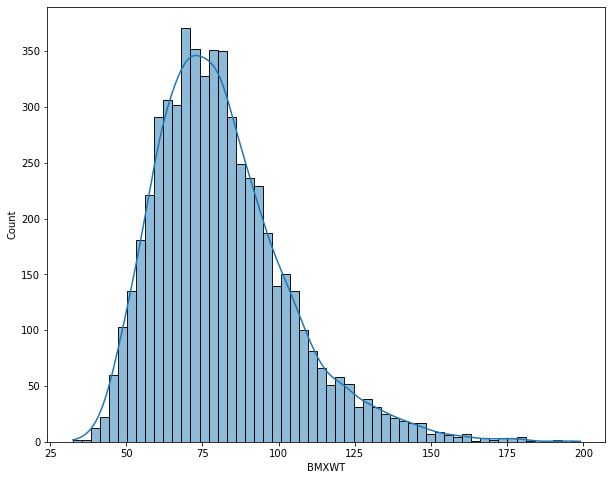

In [15]:
sns.histplot(df.BMXWT.dropna(), kde=True);

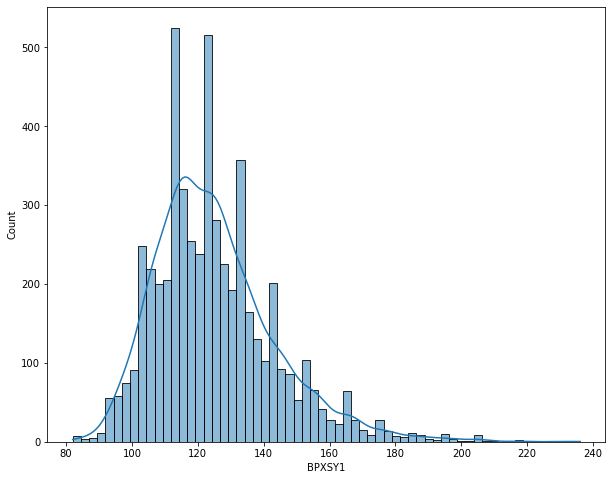

In [16]:
sns.histplot(df.BPXSY1.dropna(), kde=True);

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements

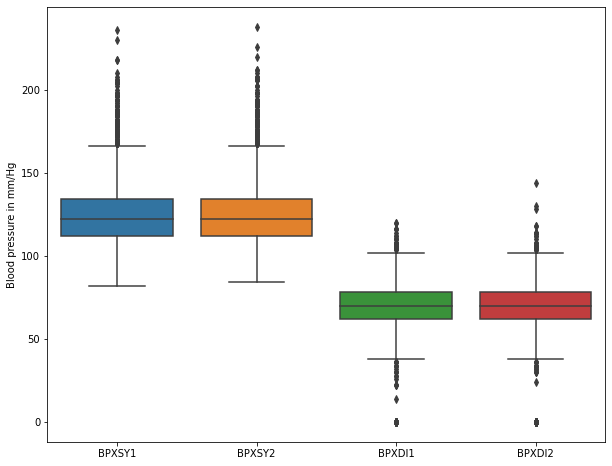

In [17]:
bp = sns.boxplot(data=df.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

## Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own. We can then compare the findings in the different strata. When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.  

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age. To see this trend in the NHANES data, we can partition the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum. Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data. Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

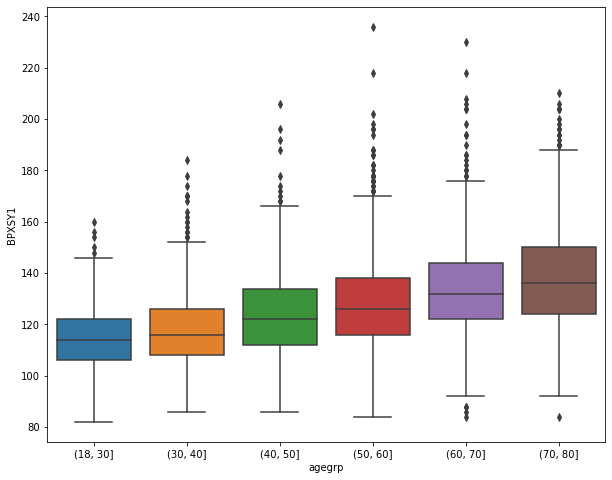

In [18]:
# Create age strata based on the following cut points
df["agegrp"] = pd.cut(df["RIDAGEYR"], [18, 30, 40, 50, 60, 70, 80])
# Make boxplot of BPXSY1 stratified by age group
sns.boxplot(x="agegrp", y="BPXSY1", data=df);

Taking this a step further, it is also the case that blood pressure tends to differ between women and men. While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure. Therefore, we will doubly stratify the data by gender and age.

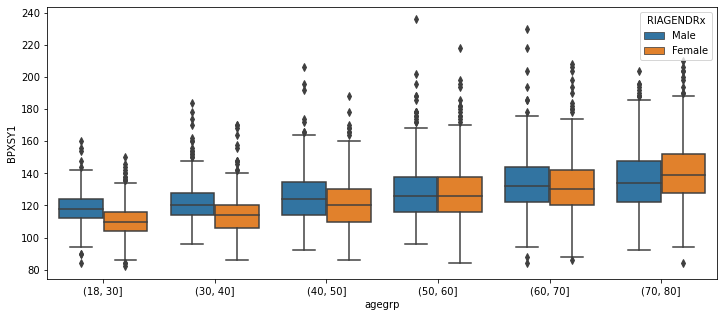

In [19]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=df);

We see from the figure above that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands. Each approach highlights a different aspect of the data.

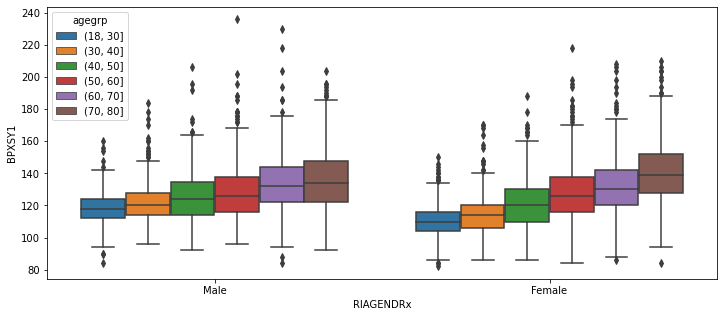

In [20]:
df['agegrp'] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y='BPXSY1', hue='agegrp', data=df);

Stratification can also be useful when working with categorical variables. Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands

In [21]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

<b>Note on causality and confounding:</b> <mark>An important role of statistics is to aid researchers in identifying causes underlying observed differences. Here we have seen differences in both blood pressure and educational attainment based on age. It is plausible that aging directly causes blood pressure to increase. But in the case of educational attainment, this is actually a "birth cohort effect". NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later. Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past. Therefore, younger people as a group have higher educational attainment than older people as a group. As these young people grow older, the cross sectional relationship between age and educational attainment will change.</mark>
